In [1]:
import numpy as np
import pandas as pd
import xarray as xr


import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import glob


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
import pandas as pd
import io

ds = xr.open_dataset('threshold_0.2/harmonics_v3.nc')
ds = ds.where((ds.lon !=124.75) & (ds.lat != 10.5))

In [4]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [5]:

dsa = xr.open_dataset('threshold_0.2/harmonics_v3.nc')
dsa = dsa.where((ds.lon !=124.75) & (ds.lat != 10.5))

In [6]:

lat = ds['lat'][:]
lon = ds['lon'][:]
f_pa_h1 = dsa['f_pa_harm1']
f_pa_h2 = dsa['f_pa_harm2']
f_pf_h1 = dsa['f_pf_harm1']
f_pf_h2 = dsa['f_pf_harm2']
f_pi_h1 = dsa['f_pi_harm1']
f_pi_h2 = dsa['f_pi_harm2']
amp_pa_harm1 = ds['amp_pa_harm1']
amp_pa_harm2 = dsa['amp_pa_harm2_updated']
amp_pf_harm1 = ds['amp_pf_harm1']
amp_pf_harm2 = dsa['amp_pf_harm2_updated']
amp_pi_harm1 = ds['amp_pi_harm1']
amp_pi_harm2 = dsa['amp_pi_harm2_updated']
f_pa_h1 = f_pa_h1[:,:,0].transpose()
f_pa_h2 = f_pa_h2[:,:,0].transpose()
f_pf_h1 = f_pf_h1[:,:,0].transpose()
f_pf_h2 = f_pf_h2[:,:,0].transpose()
f_pi_h1 = f_pi_h1[:,:,0].transpose()
f_pi_h2 = f_pi_h2[:,:,0].transpose()
phs_pa_harm1 = ds['phs_pa_harm1']
phs_pf_harm1 = ds['phs_pf_harm1']
phs_pi_harm1 = ds['phs_pi_harm1']
phs_pa_harm2_peak1 = ds['phs_pa_harm2_peak1']
phs_pa_harm2_peak2 = ds['phs_pa_harm2_peak2']
phs_pf_harm2_peak1 = ds['phs_pf_harm2_peak1']
phs_pf_harm2_peak2 = ds['phs_pf_harm2_peak2']
phs_pi_harm2_peak1 = ds['phs_pi_harm2_peak1']
phs_pi_harm2_peak2 = ds['phs_pi_harm2_peak2']

amp_pa_harm2_peak1 = ds['amp_pa_harm2_peak1']
amp_pa_harm2_peak2 = ds['amp_pa_harm2_peak2']
amp_pf_harm2_peak1 = ds['amp_pf_harm2_peak1']
amp_pf_harm2_peak2 = ds['amp_pf_harm2_peak2']
amp_pi_harm2_peak1 = ds['amp_pi_harm2_peak1']
amp_pi_harm2_peak2 = ds['amp_pi_harm2_peak2']

var_pa_harm1 = ds['var_pa_harm1']
var_pa_harm2 = ds['var_pa_harm2']
var_pf_harm1 = ds['var_pf_harm1']
var_pf_harm2 = ds['var_pf_harm2']
var_pi_harm1 = ds['var_pi_harm1']
var_pi_harm2 = ds['var_pi_harm2']

In [7]:
back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back

,lon,lat,val
52,117.0623,7.985905,6.116212
697,117.4356,8.550700,45.027230
1330,117.5013,8.876000,45.650937
1946,117.6346,8.677431,67.892276
2575,117.6480,9.019500,36.937344
...,...,...,...
378873,126.4136,8.036845,39.749621
379463,126.4482,7.049400,68.905260
380105,126.4543,7.790300,47.583436
380713,126.5649,7.327000,37.193643


In [8]:
back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
back

,lon,lat,val,sig
1,117.4356,8.550700,45.027230,8.387388
2,117.5013,8.876000,45.650937,8.679664
3,117.6346,8.677431,67.892276,22.202323
4,117.6480,9.019500,36.937344,6.144405
5,117.8392,8.774300,32.846379,5.135121
...,...,...,...,...
617,126.4136,8.036845,39.749621,6.784330
618,126.4482,7.049400,68.905260,22.403742
619,126.4543,7.790300,47.583436,9.531766
620,126.5649,7.327000,37.193643,6.199466


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_4771/2865339541.py:149: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig3.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


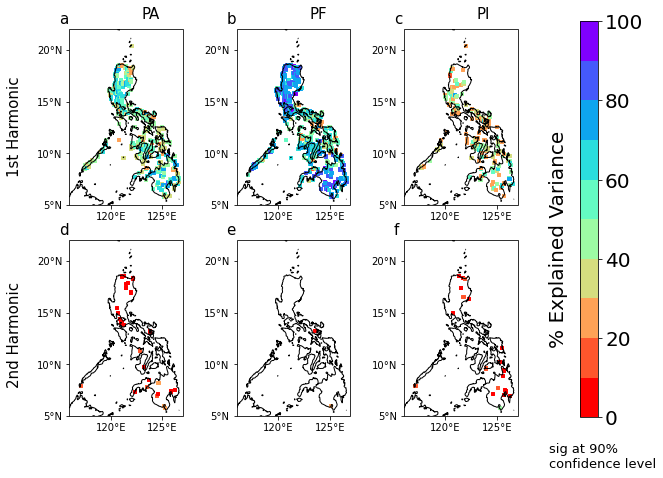

In [9]:
a4_dims = (20,20)
clvls = np.arange(0, 24, 1)
cmap = plt.cm.rainbow_r

s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
bounds = np.linspace(0, 100, 11)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
back= back[back['val'] > 25]
m_var_pa_harm1 = back

cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s",  transform=ccrs.PlateCarree())

ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(110, 8, '1st Harmonic', rotation=90, fontsize=15)
ax1.text(123, 23, 'PA', fontsize=15)


ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pa_harm2.to_dataframe("val").reset_index()
m_var_pa_harm2 = back
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s",  transform=ccrs.PlateCarree())

ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(110, 8, '2nd Harmonic', rotation=90, fontsize=15)


#############################################
ax3 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pf_harm1.to_dataframe("val").reset_index()
h = f_pf_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
m_var_pf_harm1 = back

cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())

ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(123, 23, 'PF', fontsize=15)


ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = var_pf_harm2.to_dataframe("val").reset_index()
m_var_pf_harm2 = back
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s",  transform=ccrs.PlateCarree())

ax4.set_xlim(116,127)
ax4.set_ylim(5,22)

#############################################
ax5 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
norm = mcolors.BoundaryNorm(bounds,cmap.N)  

back = var_pi_harm1.to_dataframe("val").reset_index()
h = f_pi_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
m_var_pi_harm1 = back

cs = ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)
ax5.text(123, 23, 'PI', fontsize=15)

ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pi_harm2.to_dataframe("val").reset_index()
m_var_pi_harm2 = back
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())

ax6.set_xlim(116,127)
ax6.set_ylim(5,22)
##################
ax1.text(115, 22.5, 'a',  fontsize=15)
ax3.text(115, 22.5, 'b',  fontsize=15)
ax5.text(115, 22.5, 'c',  fontsize=15)
ax2.text(115, 22.5, 'd',  fontsize=15)
ax4.text(115, 22.5, 'e',  fontsize=15)
ax6.text(115, 22.5, 'f',  fontsize=15)


plt.text(130, 12, '% Explained Variance', rotation=90, fontsize=20)
plt.text(130, 0, 'sig at 90% \nconfidence level', fontsize=13)

cax = fig.add_axes([0.98, 0.39, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax , ticks=bounds)
cb.set_ticks([0, 20, 40, 60, 80, 100])
cb.set_ticklabels([0, 20, 40, 60, 80, 100])
cb.ax.tick_params(labelsize=20)


images_dir = 'Images'
plt.savefig(f"{images_dir}/fig3.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

In [10]:
m_var_pa_harm1['pa_h1'] = m_var_pa_harm1['val']
m_var_pa_harm1 = m_var_pa_harm1[['lon','lat','pa_h1']]
m_var_pa_harm2['pa_h2'] = m_var_pa_harm2['val']
m_var_pa_harm2 = m_var_pa_harm2[['lon','lat','pa_h2']]
m_var_pf_harm1['pf_h1'] = m_var_pf_harm1['val']
m_var_pf_harm2['pf_h2'] = m_var_pf_harm2['val']
m_var_pf_harm1 = m_var_pf_harm1[['lon','lat','pf_h1']]
m_var_pf_harm2 = m_var_pf_harm2[['lon','lat','pf_h2']]
m_var_pi_harm1['pi_h1'] = m_var_pi_harm1['val']
m_var_pi_harm2['pi_h2'] = m_var_pi_harm2['val']
m_var_pi_harm1 = m_var_pi_harm1[['lon','lat','pi_h1']]
m_var_pi_harm2 = m_var_pi_harm2[['lon','lat','pi_h2']]


In [11]:
m_var_pa_harm1

,lon,lat,pa_h1
1,117.4356,8.550700,45.027230
2,117.5013,8.876000,45.650937
3,117.6346,8.677431,67.892276
4,117.6480,9.019500,36.937344
5,117.8392,8.774300,32.846379
...,...,...,...
617,126.4136,8.036845,39.749621
618,126.4482,7.049400,68.905260
619,126.4543,7.790300,47.583436
620,126.5649,7.327000,37.193643


In [12]:
m_var_pa = pd.merge(m_var_pa_harm1, m_var_pa_harm2, on=["lon", "lat"], how="left")
m_var_pa['sum'] = m_var_pa.loc[:,'pa_h1':'pa_h2'].sum(axis=1)

m_var_pf = pd.merge(m_var_pf_harm1, m_var_pf_harm2, on=["lon", "lat"], how="left")
m_var_pf['sum'] = m_var_pf.loc[:,'pf_h1':'pf_h2'].sum(axis=1)

m_var_pi = pd.merge(m_var_pi_harm1, m_var_pi_harm2, on=["lon", "lat"], how="left")
m_var_pi['sum'] = m_var_pi.loc[:,'pi_h1':'pi_h2'].sum(axis=1)
m_var_pi

,lon,lat,pi_h1,pi_h2,sum
0,117.6346,8.677431,36.921919,18.405793,55.327711
1,117.8392,8.774300,23.765165,5.464011,29.229176
2,118.4222,9.283400,44.249534,19.054497,63.304031
3,119.1783,10.411600,35.116649,7.333145,42.449794
4,119.5167,10.825100,35.665671,13.348031,49.013703
...,...,...,...,...,...
186,126.1963,9.065997,69.082895,1.481279,70.564173
187,126.2036,6.959000,42.436261,15.128353,57.564614
188,126.3006,8.224600,43.168229,0.777110,43.945340
189,126.3114,8.887600,57.845549,1.885549,59.731098


In [13]:
m_var_pf[(m_var_pf['sum'] > 60) ]

,lon,lat,pf_h1,pf_h2,sum
1,117.4356,8.550700,85.189114,4.912500,90.101613
2,117.5013,8.876000,67.326284,24.634682,91.960966
3,117.6346,8.677431,75.178014,11.055830,86.233844
4,117.6480,9.019500,80.777062,10.211674,90.988736
5,117.8392,8.774300,77.918992,3.277863,81.196856
...,...,...,...,...,...
581,126.4136,8.036845,78.708422,0.716483,79.424905
582,126.4482,7.049400,79.695727,3.803880,83.499608
583,126.4543,7.790300,60.822134,32.024968,92.847102
584,126.5649,7.327000,81.777185,1.344600,83.121786


In [14]:
m_var_pa

,lon,lat,pa_h1,pa_h2,sum
0,117.4356,8.550700,45.027230,18.146020,63.173250
1,117.5013,8.876000,45.650937,32.291442,77.942379
2,117.6346,8.677431,67.892276,17.567149,85.459424
3,117.6480,9.019500,36.937344,4.771373,41.708717
4,117.8392,8.774300,32.846379,11.105221,43.951600
...,...,...,...,...,...
480,126.4136,8.036845,39.749621,16.971969,56.721590
481,126.4482,7.049400,68.905260,12.353190,81.258450
482,126.4543,7.790300,47.583436,28.248018,75.831454
483,126.5649,7.327000,37.193643,2.297420,39.491062


In [15]:
amp_pi_harm2_peak1.transpose().to_dataframe("val").reset_index().dropna()

,lon,lat,val
52,117.0623,7.985905,1.670206
697,117.4356,8.550700,1.295837
1330,117.5013,8.876000,1.152805
1946,117.6346,8.677431,1.146891
2575,117.6480,9.019500,1.123764
...,...,...,...
378873,126.4136,8.036845,1.263182
379463,126.4482,7.049400,1.185786
380105,126.4543,7.790300,1.113139
380713,126.5649,7.327000,1.189007


In [16]:
back = amp_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back['val'].max()

0.729791800737301

In [17]:
back = amp_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back['val'].max()
back

,lon,lat,val
52,117.0623,7.985905,1.074893
697,117.4356,8.550700,1.125443
1330,117.5013,8.876000,1.263603
1946,117.6346,8.677431,1.177884
2575,117.6480,9.019500,1.169024
...,...,...,...
378260,126.3621,8.181700,1.080732
378873,126.4136,8.036845,1.051643
379463,126.4482,7.049400,1.102963
380105,126.4543,7.790300,1.417541


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_4771/762309556.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig4.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


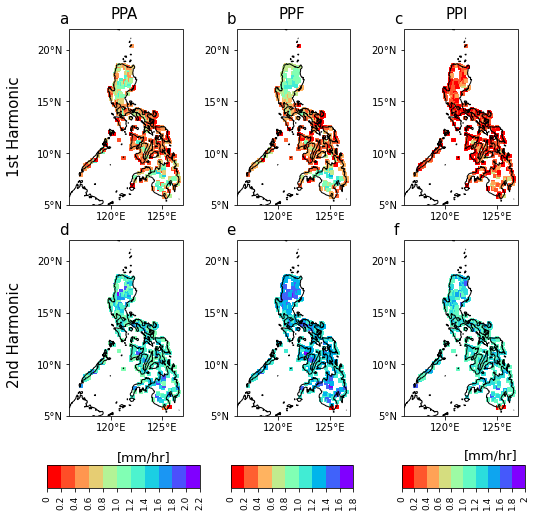

In [18]:
a4_dims = (20,20)
clvls = np.arange(0, 24, 1)
cmap = plt.cm.rainbow_r

s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
bounds = np.linspace(0, 1.2, 7)
bounds = np.linspace(0, 2.2, 12)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(110, 8, '1st Harmonic', rotation=90, fontsize=15)
ax1.text(120, 23, 'PPA', fontsize=15)


ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pa_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(110, 8, '2nd Harmonic', rotation=90, fontsize=15)


cax = fig.add_axes([0.11, 0.3, 0.25, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.4,0.2)
labels = np.arange(0,2.4,0.2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2,1.4, 1.6, 1.8, 2.0,2.2]
cb.ax.tick_params(labelsize=9)
cb.ax.set_xticklabels(labels, rotation=90)
plt.text(1.0, 2.5, '[mm/hr]', fontsize=13)
#############################################
ax3 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
bounds = np.linspace(0, 1, 6)
bounds = np.linspace(0, 1.8, 10)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(120, 23, 'PPF', fontsize=15)

ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)



cax = fig.add_axes([0.41, 0.3, 0.2, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.2,0.2)
labels = np.arange(0,2.0,0.2)
loc    = labels 
cb.set_ticks(loc)
#cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
cb.ax.set_xticklabels(labels, rotation=90)
cb.ax.tick_params(labelsize=9)


#############################################
ax5 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
bounds = np.linspace(0, 1, 6)
bounds = np.linspace(0, 2, 11)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)
ax5.text(120, 23, 'PPI', fontsize=15)

ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pi_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s",  transform=ccrs.PlateCarree())
ax6.set_xlim(116,127)
ax6.set_ylim(5,22)

ax1.text(115, 22.5, 'a',  fontsize=15)
ax3.text(115, 22.5, 'b',  fontsize=15)
ax5.text(115, 22.5, 'c',  fontsize=15)
ax2.text(115, 22.5, 'd',  fontsize=15)
ax4.text(115, 22.5, 'e',  fontsize=15)
ax6.text(115, 22.5, 'f',  fontsize=15)
##################
cax = fig.add_axes([0.69, 0.3, 0.2, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.2,0.2)
labels = np.arange(0,2.2,0.2)
loc    = labels 
cb.set_ticks(loc)
#cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2]
cb.ax.tick_params(labelsize=9)
cb.ax.set_xticklabels(labels, rotation=90)
plt.text(1.0, 2.5, '[mm/hr]', fontsize=13)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig4.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

In [19]:
from matplotlib.colors import LinearSegmentedColormap
#7b241c
#ba4a00
#ca6f1e
#e67e22
#f39c12

color_dict1 = {'skyblue': '#85c1e9',
               'brown1': '#7b241c',
               'brown2': '#ba4a00',
               'brown3': '#e67e22',
               'brown4': '#f39c12',
               'green1': '#3d9533',
               'green2': '#3ebe2f',
               'green3': '#86f762',
               'green4': '#b9f76a',
               'blue1': '#1f618d',
               'blue2': '#2980b9',
               'blue3': '#3498db',
               'skyblue': '#85c1e9'
               }

mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],
    color_dict1['brown2'],
    color_dict1['brown2'],
    color_dict1['brown3'],
    color_dict1['brown3'],
    color_dict1['brown4'],
    color_dict1['brown4'],
    color_dict1['green1'],
    color_dict1['green1'],
    color_dict1['green2'],
    color_dict1['green2'],
    color_dict1['green3'],
    color_dict1['green3'],
    color_dict1['green4'],
    color_dict1['green4'],
    color_dict1['blue1'],
    color_dict1['blue1'],
    color_dict1['blue2'],
    color_dict1['blue2'],
    color_dict1['blue3'],
    
    color_dict1['blue3'],
    color_dict1['skyblue']])

In [22]:

back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back.to_csv('phs_pa_harm1.csv')

back = phs_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back.to_csv('phs_pf_harm1.csv')

back = phs_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back.to_csv('phs_pi_harm1.csv')

In [30]:
back.groupby(['lon','lat']).agg({'val': ['mean']}).droplevel(axis=1, level=0).reset_index()

,lon,lat,mean
0,117.0623,7.985905,23.121157
1,117.4356,8.550700,13.540551
2,117.5013,8.876000,15.223247
3,117.6346,8.677431,13.983563
4,117.6480,9.019500,14.644422
...,...,...,...
617,126.4136,8.036845,18.393282
618,126.4482,7.049400,18.897435
619,126.4543,7.790300,20.134329
620,126.5649,7.327000,18.879274


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_4771/2352471362.py:153: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig5.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


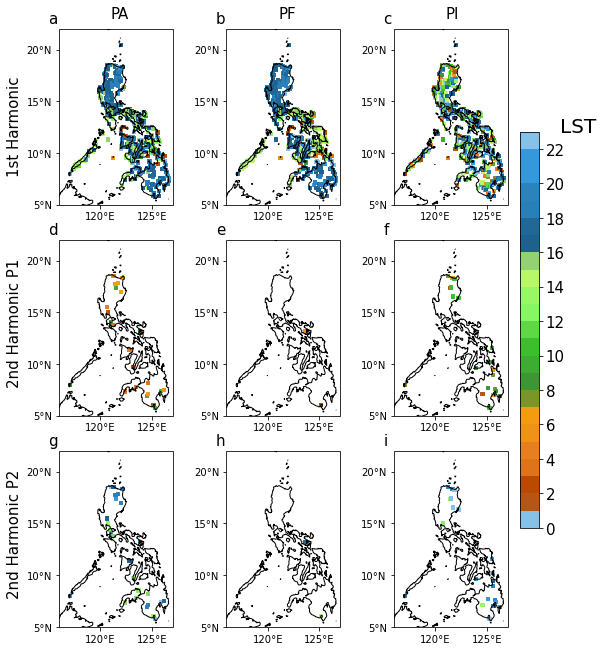

In [37]:
a4_dims = (20,20)

cmap = mycolorbar1
bounds = np.linspace(0, 23, 24)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(121, 23, 'PA', fontsize=15)
ax1.text(111, 8, '1st Harmonic', rotation=90, fontsize=15)

ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
back = phs_pa_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()

cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(111, 8, '2nd Harmonic P1', rotation=90, fontsize=15)

ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
back = phs_pa_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(111, 8, '2nd Harmonic P2', rotation=90, fontsize=15)
######################
ax4 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
back = phs_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)
ax4.text(121, 23, 'PF', fontsize=15)

ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
back = phs_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)

ax6 = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
back = phs_pf_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax6.set_xlim(116,127)
ax6.set_ylim(5,22)

##################
######################
ax7 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax7)
plot_ticks(ax7)
back = phs_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax7.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax7.set_xlim(116,127)
ax7.set_ylim(5,22)
ax7.text(121, 23, 'PI', fontsize=15)

ax8 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax8)
plot_ticks(ax8)
back = phs_pi_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax8.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax8.set_xlim(116,127)
ax8.set_ylim(5,22)

ax9 = fig.add_subplot(gs[2, 2], projection=ccrs.PlateCarree())
plot_background(ax9)
plot_ticks(ax9)
back = phs_pi_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax9.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax9.set_xlim(116,127)
ax9.set_ylim(5,22)

ax1.text(115, 22.5, 'a',  fontsize=15)
ax4.text(115, 22.5, 'b',  fontsize=15)
ax7.text(115, 22.5, 'c',  fontsize=15)

ax2.text(115, 22.5, 'd',  fontsize=15)
ax5.text(115, 22.5, 'e',  fontsize=15)
ax8.text(115, 22.5, 'f',  fontsize=15)

ax3.text(115, 22.5, 'g',  fontsize=15)
ax6.text(115, 22.5, 'h',  fontsize=15)
ax9.text(115, 22.5, 'i',  fontsize=15)
##################
cax = fig.add_axes([0.9, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax)
labels = np.arange(0,23,2)
labels = np.arange(0,25,2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels(labels)

cb.ax.tick_params(labelsize=15)
plt.text(50, 23, 'LST', fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig5.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_4771/2591883946.py:67: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig5_noTC_perhour.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


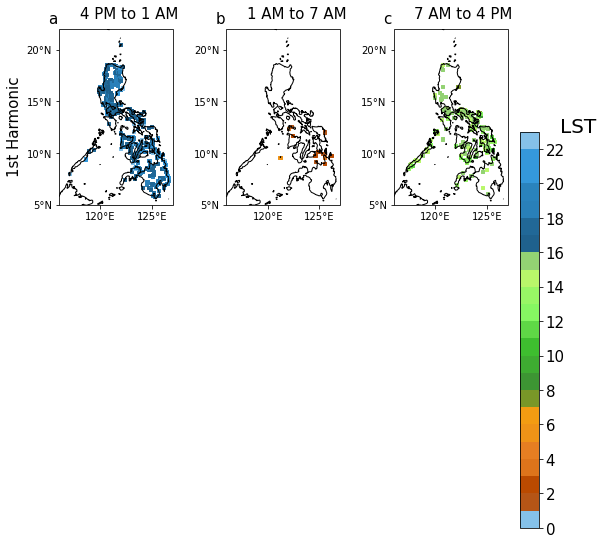

In [48]:
a4_dims = (20,20)

cmap = mycolorbar1
bounds = np.linspace(0, 23, 24)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 16) | (back['val'] <= 1)]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(118, 23, '4 PM to 1 AM', fontsize=15)
ax1.text(111, 8, '1st Harmonic', rotation=90, fontsize=15)


######################
ax4 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 1) & (back['val'] <= 7)]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)
ax4.text(118, 23, '1 AM to 7 AM', fontsize=15)


##################
######################
ax7 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax7)
plot_ticks(ax7)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 7) & (back['val'] <= 16)]
cs = ax7.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax7.set_xlim(116,127)
ax7.set_ylim(5,22)
ax7.text(118, 23, '7 AM to 4 PM', fontsize=15)



ax1.text(115, 22.5, 'a',  fontsize=15)
ax4.text(115, 22.5, 'b',  fontsize=15)
ax7.text(115, 22.5, 'c',  fontsize=15)

##################
cax = fig.add_axes([0.9, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax)
labels = np.arange(0,23,2)
labels = np.arange(0,25,2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels(labels)

cb.ax.tick_params(labelsize=15)
plt.text(50, 23, 'LST', fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig5_noTC_perhour.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_4771/4056326368.py:67: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig5_noTC_perhour_v2.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


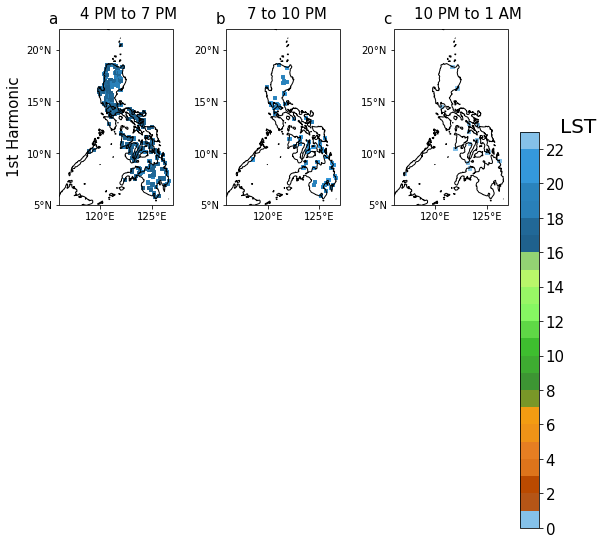

In [49]:
a4_dims = (20,20)

cmap = mycolorbar1
bounds = np.linspace(0, 23, 24)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 16) & (back['val'] <= 19)]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(118, 23, '4 PM to 7 PM', fontsize=15)
ax1.text(111, 8, '1st Harmonic', rotation=90, fontsize=15)


######################
ax4 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 19) & (back['val'] <= 22)]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)
ax4.text(118, 23, '7 to 10 PM', fontsize=15)


##################
######################
ax7 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax7)
plot_ticks(ax7)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back = back[(back['val'] >= 22) | (back['val'] <= 1)]
cs = ax7.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax7.set_xlim(116,127)
ax7.set_ylim(5,22)
ax7.text(118, 23, '10 PM to 1 AM', fontsize=15)



ax1.text(115, 22.5, 'a',  fontsize=15)
ax4.text(115, 22.5, 'b',  fontsize=15)
ax7.text(115, 22.5, 'c',  fontsize=15)

##################
cax = fig.add_axes([0.9, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax)
labels = np.arange(0,23,2)
labels = np.arange(0,25,2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels(labels)

cb.ax.tick_params(labelsize=15)
plt.text(50, 23, 'LST', fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig5_noTC_perhour_v2.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

In [41]:
phs_pa_harm1.to_dataframe("val").reset_index()

,lon,lat,val
0,117.0623,5.8214,0.0
1,117.0623,5.8659,0.0
2,117.0623,5.9126,0.0
3,117.0623,6.0560,0.0
4,117.0623,6.0723,0.0
...,...,...,...
381915,126.5698,18.5598,0.0
381916,126.5698,18.5602,0.0
381917,126.5698,18.5617,0.0
381918,126.5698,18.5897,0.0
